In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite2d_vrel'
run_name = 'nac_'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

In [5]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(data_dir+'param_env.txt')
print(env_params)

{'int_steps': '0.0005', 'ep_length': '200', 'decision_time': '0.05', 'init_theta': '0.7853981633974483', 'init_dtheta': '0', 'alphas': '-4,0,4,8,12,14,16,18,20', 'CL_alphas': '0.05,0.35,0.55,0.75,0.9,1.0,1.08,1.1,1.05', 'CD_alphas': '0.001,0.01,0.03,0.07,0.1,0.13,0.18,0.18,0.21', 'init_alpha': '8', 'beta_bins': '-3.141592653589793,-2.748893571891069,-2.356194490192345,-1.9634954084936207,-1.5707963267948966,-1.1780972450961724,-0.7853981633974483,-0.39269908169872414,0.0,0.39269908169872414,0.7853981633974483,1.178097245096172,1.5707963267948966,1.9634954084936211,2.356194490192345,2.7488935718910685,3.141592653589793', 'wind_type': 'stream', 'k_wind': '0.5', 'eps_wind': '0.2'}


In [6]:
# WRITING THE EVALUATION PARAMETERS
params = dict()
params['ev_time'] = 200 # sec
params['ep_length'] = 200 # sec. the episode length is overwritten during the evaluation
params['traj_points'] = 1000
params['gamma'] = 1
ut.write_params(params, data_dir, 'param_ev.txt')

In [7]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp -std=c++17 


In [8]:
s_traj, s_labels = ut.read_traj(data_dir+'ev_states.txt')
aux_m, aux_l = ut.read_traj(data_dir+'ev_return.txt')
returns = aux_m[:,0]
ep_length = aux_m[:,1]

In [9]:
returns

array([1090.12])

In [13]:
period = [50, 50]
def stream_vel(x, y):
    aux1 = np.sin(np.pi*x/period[0])
    aux2 = np.sin(np.pi*y/period[1])
    e = float(env_params['eps_wind'])
    k = float(env_params['k_wind'])
    vx = 0.5*k*y*(2*e*aux1*aux2 + e*np.pi*y/period[1]*aux1*np.cos(np.pi*y/period[1]) + 2)
    vy = -k*e*np.pi*y*y/(2*period[0])*np.cos(np.pi*x/period[0])*aux2;
    return vx, vy

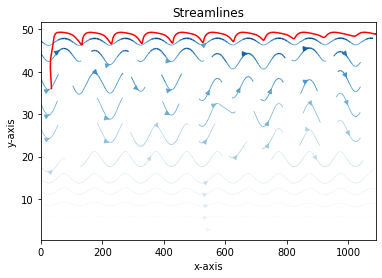

In [17]:
Lx, Ly = np.max(s_traj[:,0]), 50
Y, X = np.mgrid[0:Ly:300j, 0:Lx:300j]
U, V = stream_vel(X,Y)
speed = np.sqrt(U*U + V*V)
plt.streamplot(X, Y, U, V, density=0.6, color=speed, linewidth=speed*0.05, cmap=plt.cm.Blues)
plt.plot(s_traj[:,0], s_traj[:,1], c='red')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.savefig(plot_dir+'trajectory.png', dpi=200)

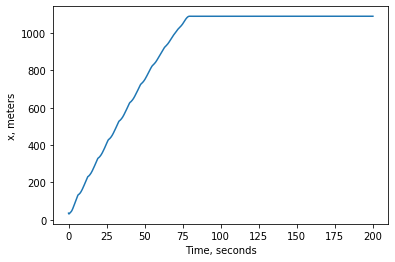

In [20]:
xs = np.linspace(0, params['ev_time'], num=len(s_traj[:,0]))
plt.xlabel('Time, seconds')
plt.ylabel('x, meters')
plt.plot(xs, s_traj[:,0])

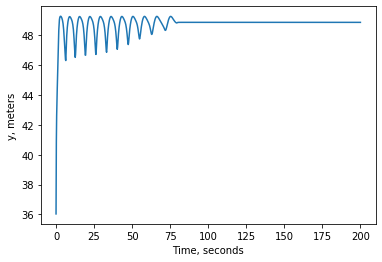

In [21]:
plt.xlabel('Time, seconds')
plt.ylabel('y, meters')
plt.plot(xs, s_traj[:,1])

In [108]:
print(s_traj[0,0], s_traj[0,1])
print(s_traj[599,0], s_traj[599,1])

34.5825 36.1479
157.27 49.4108
